In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style
sns.set_theme(style="whitegrid")

# Load Data
df = pd.read_csv('dots_points.csv')

# Remove rows with any -1 values (failed runs)
df = df[~(df == -1).any(axis=1)]

# Display first few rows
display(df.head())

# Basic Summary
print("Dataset Summary:")
display(df.describe())

,id,epsilon,baseline_dist,simp_dist,baseline_points,simp_points,delta
0,7,0.5,1.596214,1.509882,385,326,1.064143
1,4,0.5,17.790047,16.777295,136,104,11.860031
2,6,0.5,21.485921,20.261949,405,244,14.323947
3,3,0.5,21.292048,20.079181,650,464,14.194698
4,9,0.5,20.569104,19.397716,557,444,13.712736


Dataset Summary:


,id,epsilon,baseline_dist,simp_dist,baseline_points,simp_points,delta
count,47.000000,47.0,47.000000,47.000000,47.000000,47.00000,47.000000
mean,39.829787,0.5,17.307825,16.340879,593.829787,414.00000,11.538550
std,25.498780,0.0,4.852212,4.584460,421.514831,284.44515,3.234808
min,1.000000,0.5,0.000020,0.000027,2.000000,2.00000,0.000013
25%,18.500000,0.5,15.715760,14.879590,219.000000,137.00000,10.477173
50%,37.000000,0.5,18.790877,17.720445,535.000000,402.00000,12.527251
75%,57.500000,0.5,20.613581,19.515782,790.000000,607.00000,13.742388
max,92.000000,0.5,22.282330,21.010000,1729.000000,1164.00000,14.854887


/var/folders/f3/h4301l8d7hn_1612_5g5hpmw0000gn/T/ipykernel_73544/1766464425.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x='baseline_points', y='simp_points', palette='viridis', ax=axes[0], s=100)
/var/folders/f3/h4301l8d7hn_1612_5g5hpmw0000gn/T/ipykernel_73544/1766464425.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x='baseline_dist', y='simp_dist', palette='viridis', ax=axes[1], s=100)


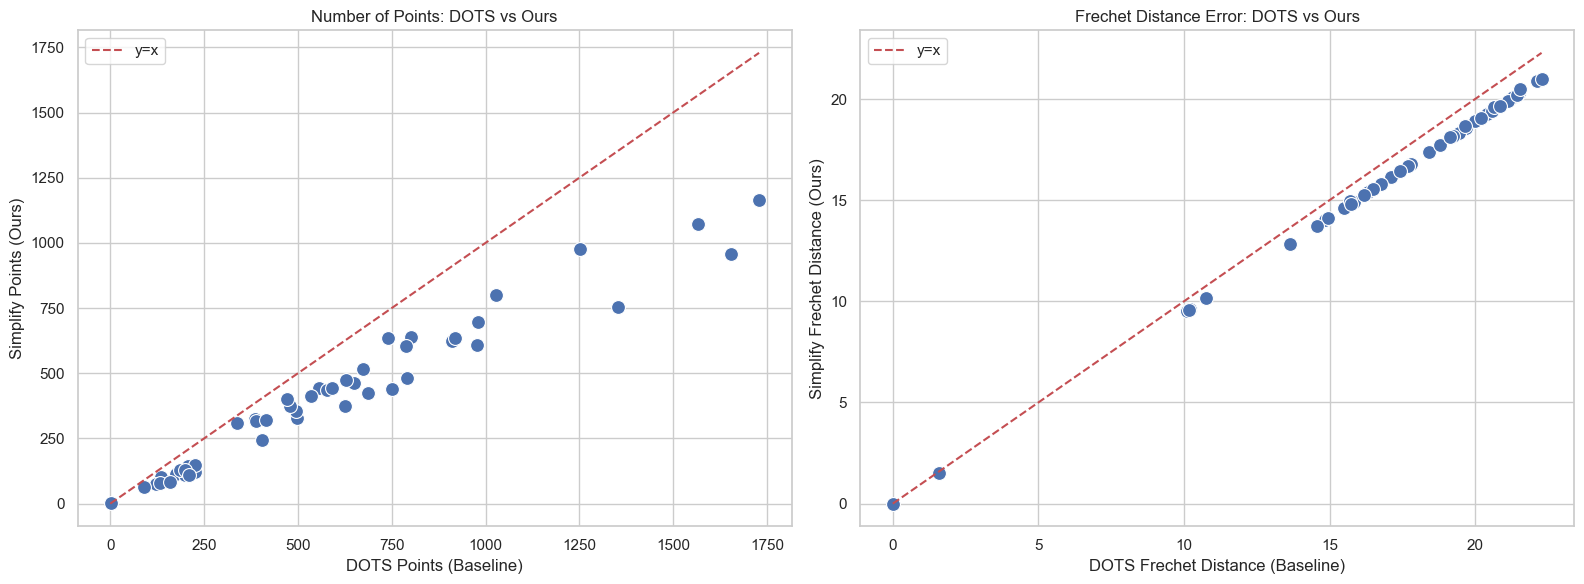

In [9]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Points Comparison (DOTS vs Simplify)
# If points are below the red line, 'Simplify' uses fewer points than 'DOTS'
sns.scatterplot(data=df, x='baseline_points', y='simp_points', palette='viridis', ax=axes[0], s=100)
max_val = max(df['baseline_points'].max(), df['simp_points'].max())
axes[0].plot([0, max_val], [0, max_val], 'r--', label='y=x')
axes[0].set_title('Number of Points: DOTS vs Ours')
axes[0].set_xlabel('DOTS Points (Baseline)')
axes[0].set_ylabel('Simplify Points (Ours)')
axes[0].legend()

# Plot 2: Error Comparison (DOTS vs Simplify)
# If points are below the red line, 'Simplify' has less error than 'DOTS'
sns.scatterplot(data=df, x='baseline_dist', y='simp_dist', palette='viridis', ax=axes[1], s=100)
max_dist = max(df['baseline_dist'].max(), df['simp_dist'].max())
axes[1].plot([0, max_dist], [0, max_dist], 'r--', label='y=x')
axes[1].set_title('Frechet Distance Error: DOTS vs Ours')
axes[1].set_xlabel('DOTS Frechet Distance (Baseline)')
axes[1].set_ylabel('Simplify Frechet Distance (Ours)')
axes[1].legend()

plt.tight_layout()
plt.show()

Performance Summary (Simplify vs DOTS):
--------------------------------------------------
Average Points Reduction: 29.84% (Positive is better)
Average Frechet Error Difference: -0.9669 (Negative means Simplify is more accurate)


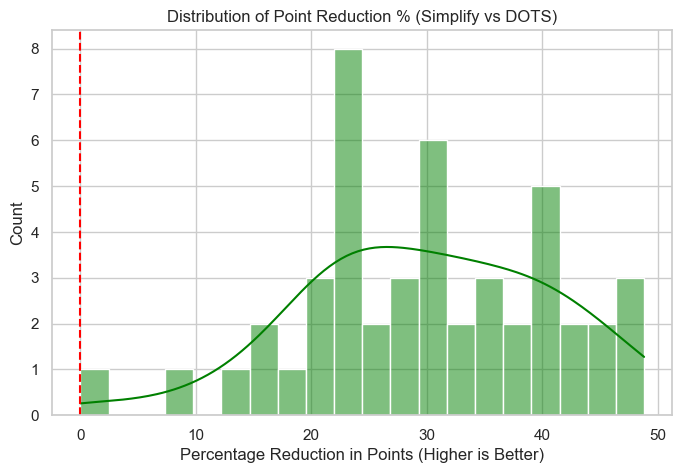

In [5]:
# Calculate Compression Improvement
# (DOTS - Simplify) / DOTS
df['points_reduction_pct'] = (df['baseline_points'] - df['simp_points']) / df['baseline_points'] * 100

# Calculate Error Difference
# (Simplify - DOTS)
df['error_diff'] = df['simp_dist'] - df['baseline_dist']

print("Performance Summary (Simplify vs DOTS):")
print("-" * 50)
print(f"Average Points Reduction: {df['points_reduction_pct'].mean():.2f}% (Positive is better)")
print(f"Average Frechet Error Difference: {df['error_diff'].mean():.4f} (Negative means Simplify is more accurate)")

# Visualize the distribution of improvement
plt.figure(figsize=(8, 5))
sns.histplot(df['points_reduction_pct'], kde=True, bins=20, color='green')
plt.axvline(0, color='red', linestyle='--')
plt.title('Distribution of Point Reduction % (Simplify vs DOTS)')
plt.xlabel('Percentage Reduction in Points (Higher is Better)')
plt.ylabel('Count')
plt.show()